In [1]:
using Interact, Plots, DifferentialEquations, BifurcationKit, Setfield
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# CLASE 1

# Ecuacion diferencial lineal. 

## Crecimiento Exponencial

Vamos a comenzar con la ecuacion diferencial mas sencilla que tiene al menos un punto fijo y que sirve para modelar, aún en una versión muy simplificada un comportamiento observado en el mundo natural.

Esta es la **ecuación diferencial lineal** sin ningun factor ni constante:

$\displaystyle \frac{dx}{dt} = x$ 

Y corresponde a un **crecimiento exponencial**. De hecho podria decirse que el crecimiento exponencial queda definido por esta ecuacion: la función solución $x(t)$ es aquella cuya derivada es igual a si misma punto a punto, es decir que **su crecimiento es directamente proporcional a su magnitud**. Esta es la famosa funcion exponencial $x(t) = e^t$.

Para una introducción amena y con algo de historia de por que esa es la función de crecimiento mas "natural" pueden verse los videos de Numberphile (https://www.youtube.com/watch?v=AuA2EAgAegE) o de 3Blue1Brown (https://www.youtube.com/watch?v=m2MIpDrF7Es).

Una forma rápida de ver por qué la derivada (y la integral definida) de $e^t$ es igual a sí misma puede verse si aceptamos como definicion de la funcion exponencial lo siguiente (para los que conozcan el desarrollo de Taylor esto es como algo que se muerde la cola pero de hecho es como se calcula numericamente esta funcion):

$\displaystyle e^t = 1+t+\displaystyle \frac{t^2}{2}+\frac{t^3}{2.3}+\frac{t^4}{2.3.4}+\frac{t^5}{2.3.4.5}+ ...$

Si derivamos termino a termino esta expresion el $1$ desaparece, el término $t$ se transforma en $1$, $t^2/2$ se transforma en $t$ y asi sucesivamente cada termino se transforma en el de la izquierda y la serie es la misma es decir que la derivada de $e(t)$ es igual a si misma. De forma similar, al hacer la integral definida desde $-\infty$ da un $1$ al integrar hasta $0$ y luego un termino $t$ al integrar el $1$ y asi sucesivamente cada termino se transforma en el de la derecha. 

Es esta es la unica funcion que tiene esta propiedad? En realidad sí, pero a menos de un factor multiplicativo. Es decir que $x(t)=x_0e^t$ tambien es solucion (con $x_0$ un numero real) ya que lo único que hace es multiplicar a cada termino por un factor constante que se preserva en la derivada. 

Entonces, las ecuaciones diferenciales no tienen solucion unica? Si, pero es necesario especificar una **condicion inicial** (en realidad tantas como variables pero aca tenemos sólo una). Recordemos que el sistema dinamico (en este caso dado por una sola ecuacion diferencial) determinaba el flujo en el espacio de fases, que en este caso corresponde a la recta de los reales. Por lo tanto, las infinitas soluciones $x(t)=x_0e^t$ corresponden a las infinitas condiciones iniciales $x_0$, ya que $x(t=0)=x_0$, y una solucion particular para una condicion inicial dada corresponde a una trayectoria en ese espacio de fases.


## Tasa de Crecimiento (Decrecimiento) exponencial

Una forma mas general de la ecuacion diferencial lineal es

$\displaystyle \frac{dx}{dt} = ax$ 

con $a$ un número real. En este caso la solución va a ser una función que derivada es igual a si misma multiplicada por la constante $a$. Tomando como base la definición de la exponencial como serie no es difícil ver que

$\displaystyle e^{at} = 1+at+\displaystyle \frac{(at)^2}{2}+\frac{(at)^3}{2.3}+\frac{(at)^4}{2.3.4}+ ...$

al ser derivada baja en uno el exponente de $t$ pero no el de $a$ entonces tenemos:

$\displaystyle \frac{d}{dt} e^{at} = a+a^2t+\displaystyle \frac{a^3t^2}{2}+\frac{a^4t^3}{2.3}+ ... = ae^{at} $

O sea que satisface la ecuacion diferencial. Al igual que antes, si incorporamos la condicion inicial $x(t) = x_0 e^{at}$ es la solucion para una condicion inicial especifica (trayectoria). 

La constante $a$ representa la **tasa de crecimiento (o decrecimiento) exponencial**. 

Si $a<0$ tenemos un decrecimiento exponencial que se va aproximando a cero (tanto desde los positivos como desde los negativos) sin llegar nunca. En el espacio de fases todas las trayectorias convergen al $x=0$, por lo tanto este es un **atractor**.


Y $x=0$ es un punto fijo porque evoluciona en si mismo ya que con esa condicion inicial $x(t)=0$. 

Si ahora volvemos al caso $a>0$, el origen $x=0$ sigue siendo un punto fijo pero ahora es un **repulsor**. Cualquier condicion inicial se aleja del cero tanto para $+\infty$ como para $-\infty$



# Ecuacion diferencial lineal más general

La ecuacion anterior es lineal porque la funcion del miembro derecho (tambien llamada campo vector que de forma general vamos a denotar como $f(x)$) es lineal con respecto a la variable ($ax$). Pero la forma mas general de una función lineal incorpora una constante con lo cual tenemos la ecuacion diferencial lineal no homogénea.

$\displaystyle \frac{dx}{dt} = ax+b$ 

con $b$ otra constante real. 
A partir de ahora (porque es practica habitual y para ahorrar espoacio vertical) vamos a reemplazar la derivada temporal por el punto arriba de la funcion, es decir que la ecuacion anterior la escribimos como 

$\dot{x} = ax+b$

Para encontrar la solución en lugar de seguir usando la serie, vamos a usar una estrategia muy recurrente y util: hacer un cambio de coordenadas. En este caso va a ser un cambio de coordenadas lineal. 

El primer paso es calcular donde está el punto fijo, es decir para que valor de $x$ se cumple que $f(x)=0$. En este caso el único punto fijo está en $x_*=-b/a$ (la notacion con estrella vamos a utilizarla tambien para distinguir los puntos fijos). De hecho no es dificil ver que **las ecuaciones lineales solo pueden tener un punto fijo** (sacando el caso "patologico" en que $a=0$) porque  resolver geometricamente $ax+b=0$ equivale a calcular el punto en el que una funcion lineal (una recta) corta el eje horizontal. Y esto de forma genérica sólo ocurre en un punto.

El cambio de coordenadas que vamos a hacer (y que vamos a repetir muchas veces en lo que sigue) es llevar el punto fijo al origen. Para eso creamos una nueva variable $\chi=x+b/a$. En la nueva variable la ecuación diferencial queda escrita como 

$\dot{\chi} = a(\chi-b/a)+b = a\chi $ 

Es decir que logramos la delicia de la matematica: volvimos al caso anterior! Ya conocemos la solucion general $\chi(t)=A e^{at}$ (ojo que acá pusimos $A$ en lugar de $x_0$ porque en este caso la constante multiplicativa no es la condicion inicial). 

Si tenemos ganas de hacer un poco de cuentas podemos volver a la variable original y fijar la constante multiplicativa a partir de la condicion inicial. Pero no lo vamos a hacer acá porque el espíritu es poder aplicar la interpretación geométrica toda vez que sea posible, representar todo en el espacio de fases antes que en expresiones analíticas cerradas (sobre todo porque despues con los sistemas no lineales esto último es imposible).

Entonces lo que tenemos es que el punto fijo (atractor si $a<0$ y repulsor si $a>0$) se desplazó del origen a $-b/a$ pero la estructura del retrato de fases es identica que el caso anterior. O sea que lo unico que hizo el termino no homogéneo es corrernos el punto fijo sin ningún cambio en el flujo.


Vamos a ver un ejemplo de un sistema "real" que obedece a esta ecuacion.


# Ley de enfriamiento de Newton

En este caso la variable $x$ es la temperatura del objeto y R es su tasa de intercambio de calor (que depende del calor especifico y el area de contacto). $x_{eq}$ es la temperatura de equilibrio (temperatura ambiente).
La evolucion de la temperatura esta dada por 

$\dot{x} = -R(x-x_{eq})$

Si bien está escrita de forma diferente es una ecuacion lineal no homogénea como la anterior con tasa $-R$ y termino constante $R/x_{eq}$. Pero escrita de esta forma queda mas claro que el punto fijo está en $x=x_{eq}$ y si restringimos a que $R$ sea positivo entonces ese punto fijo es atractor. Lo cual tiene sentido físico porque independientemente de cual sea la temperatura inicial del objeto va a terminar alcanzando la temperatura ambiente $x_eq$ ya sea que se enfrie un plato de pasta o se caliente bebida helada.

Vamos a considerar $R$ y $x_{eq}$ como los parámetros de nuestro sistema y vamos a definir la ecuación usando una función de la variable $x$ y un vector de parametros $p$ ($p[1]=R$ y $p[2]=x_{eq}$).

In [2]:
cooling(x,p,t) = -p[1]*(x-p[2])

cooling (generic function with 1 method)

Luego definimos el problema usando la funcion ODEProblem de DifferentialEquations. El problema queda definido por la funcion (cooling), la condicion inicial (x0), el tiempo inicial (0) y final (tspan) y el vector de parametros $p=[R,x_{eq}]$)

In [3]:
x0 = 80
R = 0.03
xeq = 25
tspan = (0,150.0)
prob = ODEProblem(cooling, x0, tspan, [R,xeq])

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 150.0)
u0: 80

## Evolucion temporal 
Podemos graficar la solucion del sistema y para un valor particular del parametro y de la condicion inicial

In [ ]:
sol = solve(prob)
plot(sol,size=(900,300),label="x(t)",ylabel="x")

## Multiples condiciones iniciales

Usando EnsembleProblem y un vector de condiciones iniciales (x0_arr) podemos evolucionar varias condiciones iniciales al mismo tiempo


In [ ]:
x0_arr=10.0:5.0:80.0
function prob_func(prob,i,repeat)
  remake(prob,u0=x0_arr[i])
end
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(x0_arr))
plot(sol,ylabel="x",size = (900,300))

## Interaccion
usando @manipulate podemos darle un rango al parametro, la condicion incial y el tiempo maximo de integracion y jugar con eso de forma interactiva 

In [ ]:
@manipulate throttle=.1 for R=0:0.02:1.0,x0=0:0.1:30,xeq=0:1.0:100.0,tmax=1.0:10:150
    prob = ODEProblem(cooling, x0, (0,tmax), [R,xeq])
    sol = solve(prob)
    plot(sol,label="x(t)",ylabel="x",ylim=(0,100),size=(900,300))
end

## Potencial

Todos los sistemas 1D se pueden escribir derivados de un Potencial. Un potencial $V(x)$ se define a partir de:

$\dot{x} = - \frac{dV}{dx}$

Es decir si la funcion de la derecha de la ecuacion diferencial $f(x)$ se puede escribir como la derivada de una funcion $V(x)$ (con un signo menos) entonces esa funcion es el potencial. Esa funcion siempre va a existir a menos de una constante arbitraria y se va a poder calcular integrando $f(x)$.

Cual es la utilidad del potencial? Por ahora solo como una representacion. La dinámica temporal de la variable $x$ se puede interpretar también como el movimiento de una partícula con mucha friccion que se mueve bajo la accion de la gravedad en ese potencial. Los picos y valles de ese potencial representan los puntos fijos inestables y estables respectivamente. Las trayectorias $x(t)$ se mueven naturalmente hacia los pozos, minimos locales del potencial, y si son colocadas cerca de un pico se apartan del mismo.

Para la Ley de Enfriamiento de Newton el potencial se puede calcular de forma explicita:

$V(x) = Rx(x/2-x_{eq})$

se puede verificar que:

$\frac{dV}{dx} = R(x-x_{eq})$

La forma del potencial es una parabola que corta al eje horizontal en $x=0$ y $x=2x_{eq}$ son el minimo de potencial (punto fijo estable) en $x=x_{eq}$. Por lo tanto cualquier condicion inicial para $x$ va a evolucionar hacia el  fondo del pozo (no nos interesa aca la forma en la que se aproxima sino el destino final).


# Flujos en 1D. 

Si bien lo que vimos antes también eran flujos en 1D ahora vamos a escribirlos de la forma mas general posible:

$\dot{x} = f(x)$

Los puntos fijos seran todos aquellos valores $x_*$ para los cuales se cumple $f(x_*)=0$, es decir los **ceros** de la funcion. Y el flujo sobre el espacio de fases (la recta horizontal) va a tener solo dos sentidos posibles: hacia la derecha cuando $f(x)>0$ y hacia la izquierda cuando $f(x)<0$. 

Podemos incluir en un mismo grafico $f(x)$ en el eje vertical y $x$ con el flujo sobre la recta (espacio de fases) en el eje horizontal. Para una funcion arbitraria solo con graficarla tenemos los puntos fijos y los intervalos de positividad y negatividad me determinan el ordenamiento del flujo. Por ejemplo:

<div>
  <img src="../files/flujos1Dposneg.png" width="700px">
</div>

En este grafico podemos aplicar algunas de las primeras herramientas geométricas y **topológicas** de la dinámica (o mas formalmente de la teoría cualitativa de los sistemas dinámicos) sin necesidad de cálculos analíticos. 

El campo vector $f(x)$ puede ser una función muy complicada con muchos cruces del cero pero a partir de este gráfico queda completamente determinado el sentido del flujo en todo el espacio de fases (para mayor claridad cambiamos de color al cambiar el sentido), aunque no tengamos una expresión para $x(t)$. El sentido del flujo determina que puntos fijos seran atractores o repulsores y en este caso tenemos de izquierda a derecha: atractor-repulsor-atractor-repulsor-atractor. La alternancia de atractor repulsor es generica para cualquier función (por qué?). Esto implica que si **conozco los puntos fijos y la estabilidad de uno de ellos conozco el sentido del flujo en todo el espacio de fases**. Aca el sentido del flujo se refiere a las flechas rojas y verdes del grafico anterior y constituye una característica **topologica** del retrato de fases. No importa la posicion de los puntos fijos ni si el flujo va mas rapido o mas lento, lo que importa es la cantidad de puntos fijos y el sentido del flujo (o de forma equivalente su estabilidad que determina el sentido). Si esto no cambia para pequeñas perturbaciones de los parámetros del sistema se dice que el sistema es **estructuralmente estable** (o robusto). Si lo hace para perturbaciones no importa cuan pequeñas seas es porque estamos en una **bifurcación** (lo vamos a ver más adelante).

Observamos tambien que cada vez que la función cruza el eje horizontal (punto fijo) con pendiente negativa el punto fijo es atractor (ya que una perturbacion hacia la derecha vuelve a la izquierda y viceversa), mientras que si la pendiente es positiva el punto fijo es repulsor (una perturbacion para la derecha se sigue moviendo a la derecha y lo mismo hacia el otro lado, la perturbacion se amplifica). 

Esto ultimo que indicamos como una observacion puede probarse que tiene caracter general: **la derivada de la funcion del campo vector  ($df/dx$) evaluada en el punto fijo me determina su estabilidad. Si la derivada es negativa el punto fijo es atractor y si la derivada es positiva es repulsor** 

Derivar la funcion y evaluarla en el punto fijo se conoce como **linealización**. Por qué? Porque para cualquier funcion $f$ la mejor aproximación lineal en un entorno de un punto $x_*$ equivale a la funcion evaluada en ese punto $f(x_*)$ (que es cero porque estamos en un punto fijo) sumado a la derivada (pendiente de la recta tangente a la funcion en ese punto esa es la interpretacion geometrica de la derivada) multiplicada por el apartamiento del punto $f'(x_*)(x-x*)$, donde usamos la prima $'$ para denotar la derivada con respecto a la variable $x$. Tener en cuenta que $f'(x_*)$ es una constante porque es la derivada evaluada en el punto fijo. Dicho de otra manera, podemos aproximar muy cerca del punto fijo a nuestro sistema dinamico no lineal como un sistema lineal:

$\dot{x}=f'(x_*)(x-x_*)$

Es decir que en un entorno de un punto fijo atractor (si $f'(x_*)<0$ ) las trayectorias convergen como una exponencial decreciente al atractor, mientras que en un punto fijo repulsor (si $f'(x_*)>0$ ) las trayectorias divergen exponencialmente, al igual que en un sistema lineal. 

Otra forma de pensarlo es la siguiente: la función $f(x)$ se va a poder aproximar en un entorno del punto fijo $x_*$ como un desarrollo en potencias de $(x-x_*)$ (es lo que se conoce como desarrollo de Taylor):

$f(x) = f'(x_*)(x-x_*)+\frac{1}{2}f''(x_*)(x-x_*)^2+\frac{1}{2.3}f'''(x_*)(x-x_*)^3+...$

Cuando estoy suficientemente cerca del punto fijo, el término que domina es el lineal y entonces podemos aproximar nuestro sistema como uno lineal.

Pero, qué pasa cuando $f(x)$ es tangente a la recta? Lo anterior deja de valer poque la derivada es cero, el término lineal no está presente y la mejor aproximación es una parábola (función cuadrática). Y que pasa cuando una parábola cruza el eje horizontal con los puntos fijos? Vamos a ver esto en seguida porque es el elemento central de la clase, pero antes vamos a ver un ejemplo clásico de sistema no lineal y su linealización.


# Ecuacion Logistica

En lo que sigue vamos a trabajar con modelos simples de dinámica de poblaciones donde la variable continua puede representar la densidad de una población (es decir tanto variable como el tiempo evolucionan de forma continua). En este contexto es usual denotar la tasa de crecimiento como $R$ (rate). Por lo tanto la ecuación:

$\dot{x} = Rx$

corresponde al crecimiento exponencial ilimitado de la densidad de poblacion a tasa $R$. 

Pero El crecimiento exponencial no se puede mantener por siempre, por lo tanto si queremos modelar de una forma un poco mas realista una magnitud que crece con recursos limitados (que acá vamos a llamar capacidad $K$) tenemos que limitar la tasa de crecimiento $R$. Una forma posible (la mas simple) es limitar $R$ con una funcion lineal haciendo que se haga cero cuando la poblacion alcanza la capacidad maxima $K$. Es decir que nuestra tasa de crecimiento variable sea: $R(x)=R(1-x/K)$. Reemplazando este rate en la ecuacion original obtenemos la ecuación logística 

$ \dot{x} = Rx(1-x/K) $ 

con $K>0$ y $R>0$.

Este es el sistema mas simple que modela el crecimiento de una poblacion con capacidad K.

## Análisis de puntos fijos y estabilidad 

Esta ecuacion presenta dos puntos fijos. Uno en $x=0$ y el otro en $x=K$. Para evaluar su estabilidad calculamos la derivada del campo vector $f(x)=Rx(1-x/K)$, que es igual a $f'(x)=R-2Rx/K$, y la evaluamos en los puntos fijos.

- Punto fijo $x_*=0$: $f'(0)=R$ siempre positiva, el punto fijo es inestable (repulsor). En su vecindad, para una pequeña poblacion positiva se presenta un crecimiento exponencial con tasa R ya que 1 es mucho mayor que $x/K$.

- Punto fijo $x_*=K$: $f'(K)=-R$ siempre negativa, el punto fijo es estable (atractor). Representa la poblacion maxima que alcanza el crecimiento.  Si $x$ es ligeramente inferior a $K$ entonces $(1-x/K)$ es positivo, la derivada es positiva y la población crece. Si en cambio $x$ es ligeramente superior a $K$ luego $(1-x/K)$ es negativo, la derivada es negativa y la población decrece hasta alcanzar el equilibrio en $x=K$.


In [2]:
# Ecuacion Logistica
logistic(x,p,t)=p[1]*x*(1.0-x/p[2])

logistic (generic function with 1 method)

In [ ]:
@manipulate throttle=.1 for R=0:0.02:2.0,K=0:0.01:2.0,x0=0:0.02:2.0,tmax=1.0:5:50
    prob = ODEProblem(logistic, x0, (0,tmax), [R,K])
    sol = solve(prob)
    plot(sol,label="x(t)",ylabel="x",ylim=(0,2.0),size=(900,300))
end

In [ ]:
# multiples trayectorias
x0_arr=0.0:0.1:2.0
prob = ODEProblem(logistic, 0.2, (0,50), [0.3,1.0])
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(x0_arr))
plot(sol,ylabel="x",size = (900,300))

## Evolucion temporal y f(x)
Ahora vamos graficar, ademas de la evolucion temporal, la funcion $f(x)$ para poder visualizar los puntos fijos y el flujo sobre la linea.

Para eso vamos a usar la función del paquete del curso **flux1D** cuyos argumentos son (para el método básico)

**flux1D(f,x0,tmax,p;xlims)**
- f es una Funcion f(x,p,t) que define el flujo (devuelve la derivada)
- x0 es un escalar que da la condicion inicial
- tmax es un escalar que da el tiempo final de integracion (siempre parte de t=0)
- p es un vector (array 1D) con los parametros del sistema. Aunque tengamos un solo parametro lo tenemos que pasar como un array de un solo elemento
- la tupla xlims=(xmin,xmax) limita el grafico de f(x) entre el intervalo (xmin,xmax). Este parametro es opcional por eso esta despues del punto y coma


Podemos ver que $f(x)$ es una parabola invertida que corta el eje horizontal siempre en los puntos fijos $x=0$ y $x=K$
y siempre con la misma estabilidad. Es decir no hay cambios topológicos (no hay bifurcaciones).
Por qué invertida? Cómo sería al revés en los positivos?


In [4]:
@manipulate throttle=.1 for R=0:0.02:2.0,K=0.01:0.01:2.0,x0=0:0.02:2.0,tmax=1.0:5:30
    flux1D(logistic,x0,tmax,[R,K];xlims=[-0.1,2.0])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000f405f50, Task (runnable) @0x000000000f405f50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Potencial de la Ecuacion Logistica

En este caso el potencial es una función cúbica:

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right)$

que tiene un minimo en $x=K/2$ y corta el eje horizontal en $x=3K/2$ y lo toca tangencialmente con un pico (raiz doble) en $x=0$. Veamos el aspecto que tiene y como evoluciona la trayectoria desde el punto inicial hasta el fondo del pozo.

In [ ]:
Vlogistic(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)
@manipulate throttle=.1 for R=0:0.02:2.0,K=0.01:0.01:2.0,x0=0:0.01:2.0
    potential1D(Vlogistic,x0,100.0,[R,K];xlims=[0.0,max(2*K,x0)])
end

# Bifurcacion de Atractor - Repulsor (Saddle Node)

El flujo 1D queda caracterizado cualitativamente por sus puntos fijos y su estabilidad. Pueden estos cambiar? Cuál es la forma más general? Antes habiamos hablado de la estabilidad estructural y la habiamos referido a la invariancia de la estructura topológica frente a pequeñas perturbaciones en los parámetros. También nos habiamos preguntado por lo que sucedía cuando $f(x)$ rozaba tangencialmente el eje horizontal en un punto fijo y la linealización dejaba de ser válida. No es difil ver que cuando esto último sucede estamos ante la inminencia de un cambio en la estructura topológica del flujo. Podemos pensar en la funcion f(x) como una soga serpenteante que varia con los parametros. La estructura topológica del flujo no va a cambiar siempre que tengamos la misma cantidad de cruces (cantidad de puntos fijos) y no cambie la secuencia de cruces para arriba, para abajo, para arriba, etc. Cual es la forma genérica en que puede cambiar? cuando un "lazo" que está del lado positivo o negativo cruza el eje como se ve en la secuencia de dibujos siguiente en las que tenemos tres valores de parametros del sistema diferentes:

<div>
  <img src="../files/flujos1DSN.png" width="500px">
</div>

En ese caso en el punto exacto donde se produce el cambio (diagrama del centro) suceden dos cosas simultáneamente:

- dos puntos fijos están fusionados en uno solo. Cualquier perturbacion por más pequeña que sea hacia un lado los hace desaparecer y hacia el otro genera dos puntos fijos. Ademas esos dos puntos fijos son siempre un atractor y un repulsor. 
- la derivada del campor vector es cero en ese punto $f'(x_*)=0$ por lo tanto deja de valer la linealización

La conclusion es que no hay forma genérica de cambiar la estabilidad de los puntos fijos sin crear o destruir un par de puntos fijos: un atractor y un repulsor. Esto es la bifurcación de **nodo-repulsor** (que que conoce como nodo silla o saddle node **SN** en sistemas de mas de una dimension). dicho de otra manera un punto fijo no puede pasar de ser estable a inestable sin pasar por cero y esto no lo puede hacer de forma genérica sin colapsar con otro punto fijo de estabilidad complementaria (pensemos que intentamos invertir la pendiente de uno de los tramos de la cuerda negra de arriba donde corta el eje horizontal. 
Acá "forma genérica" se refiere a que no hay impuesta ninguna condición adicional. Si forzamos a que el origen sea siempre un punto fijo o hay alguna condición de simetría hay otros casos posibles como vamos a ver más adelante

Vamos a definir más formalmente una bifurcación:
**Cualquier cambio de la cantidad de puntos fijos o de su estabilidad al variar los parámetros del sistema se conoce como  una bifuración local**. Local se refiere a que ocurre en un punto determinado del espacio de fases. 


## Forma normal de la Bifurcación SN 

mas adelante vamos a dar una definición más formal de forma normal, por ahora la vamos a presentar como el modelo 
más general o más "sencillo" que presenta una determinada bifurcación que se produce en el origen y para un valor de parámetro igual a cero. Sistemas particulares que tengan una bifurcacion local en algun otro punto para algun otro valor de parámetros se van a poder llevar a la forma normal mediante un cambio de coordenadas.

En el caso de la bifurcacion de atractor repulsor (o SN en una dimensión) resulta medianamente intuitivo, tanto por el dibujo de arriba como por lo que discutimos cuando nos preguntabamos que pasaba con la linealización si la derivada de $f$ se hacía cero en el punto fijo, que la forma más simple y genérica de tener una bifurcacion de SN es mediante una parábola (cuadrática) que corta el eje horizontal en el origen para el valor de parámetro cero. Es decir:}

$\dot{x} = a-x^2$

esta es la versión con la parábola invertida pero podriamos tener de forma equivalente otra ecuación con el término cuadrático positivo.

Para este sistema tenemos dos puntos fijos (el repulsor a la izquierda y el atractor a la derecha) cuando $a>0$ y ningún punto fijo para $a<0$. En $a=0$ la parabola "besa" el eje horizontal y los dos puntos fijos colapsan en uno solo (que es atractor  por la derecha y repulsor por la izquierda). 

La forma normal nos da otra información importante que tiene que ver con el escaleo. En un entorno de la bifurcación, cuando se crean los dos puntos fijos con estabilidad complementaria están ubicados en $x_*=\pm \sqrt{a}$. Es decir que se alejan del punto de coalescencia (o de surgimiento) con un escaleo que va como la raiz cuadrada del parámetro. Cuando encontremos bifurcaciones de repulsor atractor (o de nodo silla en dimensiones superiores) habrá siempre un entorno, para valores de parámetro cercanos al valor de la bifurcación, donde este escaleo se observa también, por lo tanto podremos anticipar la ubicación de los puntos fijos sin necesidad de encontrar los ceros del campo vector.


## Diagrama de bifurcaciones

Una representación que vamos a encontrar de forma muy frecuente y que sirve para caracterizar un sistema dinámico dado es el **diagrama de bifurcaciones** en el espacio producto de las variables y parámetros. En el caso de la forma normal de la SN tenemos una variable ($x$) y un parametro ($a$) y es practica usual representar el parámetro en el eje horizontal (porque de hecho es la variable independiente de control de nuestro problema y la variable en el eje vertical. Es decir que ahora el espacio de fases va a aparecer de forma vertical. También es usual no representar todo el flujo sino solo los puntos de fijos. Los puntos fijos son **ramas** en el diagrama de bifurcaciones que dan para cada valor del parámetro la ubicacion del mismo (podriamos escribirlos incluso como una funcion del parametro, por ejemplo $x_*(a)$). Finalmente podemos usar el color azul para las ramas correspondientes a los puntos fijos estables (o atractores) y rojo para los inestables (o repulsores). 

Teniendo en cuenta todo esto el diagrama de bifurcaciones para la forma normal de la bifurcación SN es el siguiente:

<div>
  <img src="../files/BifurcationDiagram.png" width="500px">
</div>

La bifurcacion de SN ocurre en el punto $a=0$, $x=0$ del diagrama (punto verde) del cual surgen para la derecha ($a>0$) una rama estable para el atractor (azul) y otra inestable para el repulsor (rojo) que se alejan del punto de bifurcacion como $\pm \sqrt{a}$. 

Vamos a interactuar con la forma normal de la bifurcación SN usando la funcion **flux1D** pero con un metodo adicional. Las funciones en Julia tienen multiple dispatch, es decir pueden recibir diferentes tipos argumentos, generando diferentes metodos. En este caso le agregamos un argumento mas luego del vector de parametros que es una funcion anonima para cortar la integracion. Como detalle tecnico eso se hace mediante una funcion de Callback **DiscreteCallback** que si cumple una condicion (en este caso que la variable sea menor que -1), llama a la una funcion que termine la integracion (**terminate!**). Pero de todas maneras eso es interno a flux1D, lo unico que le pasamos aca es la funcion que da la condicion para terminar: $(u)->(u<-1.0)$


In [5]:
@manipulate throttle=.05 for a=-0.5:0.01:0.5,x0=-1:0.02:1,tmax=1.0:5:50
    nodosilla(x,p,t)=p[1]-x*x
    flux1D(nodosilla,x0,tmax,[a],(u)->(u<-1.0);xlims=[-1.0,1.0],title="Nodo Silla")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000077b5ed60, Task (runnable) @0x0000000077b5ed60), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-0.5\",\"-0.49\",\"-0.48\",\"-0.47\",\"-0.46\",\"-0.45\",\"-0.44\",\"-0.43\",\"-0.42\",\"-0.41\",\"-0.4\",\"-0.39\",\"-0.38\",\"-0.37\",\"-0.36\",\"-0.35\",\"-0.34\",\"-0.33\",\"-0.32\",\"-0.31\",\"-0.3\",\"-0

# Ecuacion Logistica con Harvest

Vamos a ver ahora un modelo de población simple que atraviesa una bifurcacion de atractor-repulsor (o SN en 1D). 

Todos los modelos poblacionales que vamos aver a continuación se basan en el modelo logístico y agregan un término adicional que da cuenta de la predación, ya sea por otra especie o por la explotación de la especie como recurso. En su version mas simple se agrega un termino de decrecimiento constante que representa el harvest (cosecha, caza, pesca)

$ \dot{x} = Rx\left(1-\displaystyle \frac{x}{K}\right) - H$ 

Atencion: no es un modelo realista para una poblacion porque me puede dar un valor de x negativo. Debido a esto vamos a tener que introducir una condicion de corte como en el caso anterior pero en este caso cuando la variable se hace negativa: $(u)->(u<0)$

In [7]:
# Ecuacion Logistica con harvest
logharvest1(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]

logharvest1 (generic function with 1 method)

In [8]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0.01:0.01:2.0,H=0:0.01:0.5,x0=0:0.02:2.0,tmax=1.0:5:50
    flux1D(logharvest1,x0,tmax,[R,K,H],(u)->(u<0);xlims=[0.0,2.0],title="Logistica con Harvest")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008a671910, Task (runnable) @0x000000008a671910), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

Ahora para calcular los puntos fijos tenemos que resolver una ecuación cuadrática. Pero antes de meternos en eso vamos a volver a la interpretación geométrica del campo vector $f(x)$. El primer término es el mismo que el de la ecuación logística y es una parábola invertida que corta el eje horizontal en $x=0$ y $x=K$ con la misma pendiente de signo opuesto $R$ y $-R$ respectivamente, por lo tanto el punto máximo de la parábola está justo en el centro de los dos puntos fijos $x=K/2$. En ese punto el valor del campo vector es $f(K/2)=RK/4-H$. Notar que si bien hicimos algunas cuentas, utilizamos únicamente argumentos geométricos y evaluaciones del campo vector.

Cuál es el efecto del término constante $-H$? Simplemente bajar el gráfico de la parábola invertida lo cual hace que los dos puntos fijos se acerquen simétricamente al punto medio $x=K/2$. La estabilidad de los mismos sigue siendo igual. El repulsor a la izquierda se corre para un valor de $x$ positivo y el atractor de la derecha se corre para un valor menor. la interpretación de este corrimiento en términos del modelo poblacional es la siguiente: (a) que el atractor sea menor que $K$ da cuenta del efecto de la predación o explotación al disminuir el valor hacia el cual tiende la población, (b) que el repulsor tenga un valor positivo implica que si la población inicial no alcanza un valor mínimo (el de ese punto fijo) no alcanza el valor de equilibrio y la población se extingue. A mayor valor del parámetro $H$ mayor proximidad de los puntos fijos y más crítica se torna la situación. La población máxima es cada vez menor y el punto de inflexión que separa los dos futuros posibles de sustentaibilidad o extinción se hace cada vez mayor. Finalmente los dos puntos fijos van a colapsar cuando el campo vector en ese punto se haga cero, es decir cuando $H=RK/4$. Para ese valor de parámetros vamos a tener una bifurcación de atractor y repulsor, todo el flujo es hacia la izquierda y la población se extingue para cualquier condición incial.

Todo este análisis, mas lo que se ve en las celdas interactivas permite suponer que se produce una bifurcación SN. Pero para demostrar que esa es la bifurcacion que se produce efectivamente deberiamos poder llevar la ecuación diferencial en un entorno de la bifurcación a la forma normal de la SN. En este caso además podemos hacer un cambio de coordenadas que va a llevarnos todo el flujo a la forma normal (esto sucede solo en este caso porque tenemos sólo términos cuadráticos). 

Nuestro cambio de coordenadas propuesto es llevar el punto donde se produce la bifurcación al origen. Comenzamos definiendo la variable $\chi = x-K/2$. Si reemplazamos en la ecuación diferencial obtenemos:

$\dot{\chi}=R\left(\chi+\displaystyle\frac{K}{2}\right)\left(\displaystyle\frac{1}{2}-\displaystyle\frac{\chi}{K}\right)-H = \displaystyle\frac{RK}{4}-H-\displaystyle\frac{R}{K}\chi^2$

El paso siguiente es hacer un re-escaleo del tiempo definiendo un nuevo tiempo $\tau=tK/R$. Volvemos a la notación explícita de la derivada para que quede claro que cambiamos la escala temporal y la ecuación queda:

$\displaystyle\frac{d\chi}{d\tau} = \displaystyle\frac{K^2}{4}-\displaystyle\frac{KH}{R} - \chi^2$

notar que el escaleo temporal multiplico el miembro derecho por $K/r$.
El último paso es definir nuestro parámetor de control como $a=K^2/4-KH/R$, con lo cual llegamos a la forma normal de la SN:

$\displaystyle\frac{d\chi}{d\tau} = a - \chi^2$

que tiene una bifurcacion de SN en ($a=0$,$\chi=0$), es decir cuando $H=RK/4$ y $x=K/2$. Y los puntos fijos se van a alejar de ese punto medio como $\pm\sqrt{a}$, es decir como $\pm\sqrt{K^2/4-KH/R}$. De hecho como en este caso, sólo tenemos términos cuadráticos esta aproximación cerca de la bifurcación vale para todo los valores del parámetro. Los puntos fijos van aa estar ubicados entonces en 

$\chi_* = \pm\sqrt{a}$

$x_* = K/2  \pm \sqrt{K^2/4-KH/R}  $

Este último resultado es el mismo que hubiésemos obtenido al principio resolviendo la cuadrática. Llegamos a lo mismo tras un largo recorrido que podriamos resumir en: (a) cambio de coordenadas, (b) reescaleo del tiempo, (c) redefinicion del parametro de control, para llevar nuestro sistema a la forma normal de la bifurcación SN. Si bien puede parecer más arduo en este caso es el mecanismo general que nos va a servir para campos vectores más complicados e incluso para dimensiones mayores. 

## Bifurcacion SN usando BifurcationKit

Vamos a utilizar este caso sencillo para ejemplificar el uso de un paquete muy poderoso para el estudio de sistemas dinámicos en Julia: el package BifurcationKit. Como vamos a ver tiene sus complejidades pero por ahora lo que nos va a importar es que:

- Tenemos que definir la funcion del fampo vector $F$ como funcion solo de x y los parametros es decir le asignamos t=0, esto se hace en la primera linea (el macro @. es para aplicar un broadcast a lo que sigue)
- Barremos el parametro H que es el tercer elemento del array p, y eso lo indicamos con @lens _[3]
- Barremos el parametro desde pMin hasta pMax. Es importante que en pMin haya al menos una solucion.

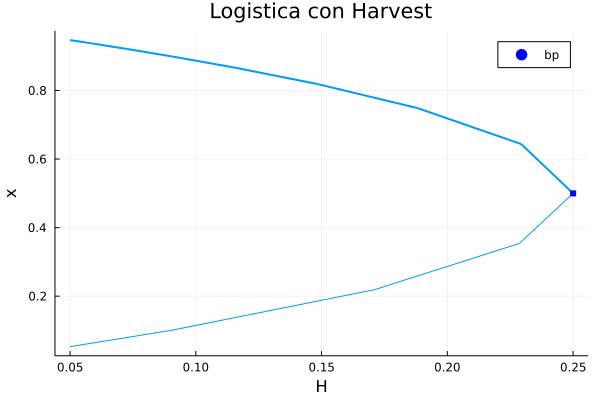

In [10]:
R=1.0; K=1.0
Hmin=0.05; Hmax=0.3
F=(x,p) ->  @. logharvest1(x,(p,),0)
opts = ContinuationPar(pMin=Hmin,pMax=Hmax, detectBifurcation=3)
br, = continuation(F,[1.0],[R,K,Hmin],(@lens _[3]), opts)
plot(br,xlabel="H",title="Logistica con Harvest")

... y tenemos el diagrama de bifurcaciones. 

El eje horizontal corresponde a $H$. Para $H=RK/4=0.25$ tenemos la bifurcacion de SN (indicada por el punto azul), la rama estable en linea gruesa y la inestable en linea fina. Por que esta invertido con respecto a al forma normal de derecha a izquierda? Pensar en la redefinición de parámetros del paso anterior.

## Critical Slowing Down

Supongamos que tenemos el modelo logistico con harvest para los valores de capacidad y crecimiento $K=1$ y $R=1$, y queremos saber cual es el maximo valor de recursos que podemos extraer $H$ antes de que se extinga (catastroficamente) la poblacion. Segun el modelo sabemos que cuando la poblacion se aproxime a $K/2=0.5$ extrayendo algo menos de $KR/4=0.25$ recursos estamos al borde de la extincion. Pero si no tenemos el modelo. Hay alguna indicacion en la dinamica que nos de una pista de que estamos cerca de la bifurcacion? 

Una posibilidad es perturbar el sistema que se encuentra en su punto fijo estable. con un pequeño pulso en la variable de amplitud $S$. Como el punto fijo es estable va a volver al equilibro con un decaimiento exponencial. Lo interesante es que a medida que nos aproximamos a la bifurcacion SN ese tiempo de decaimiento se va haciendo más y más largo (de ahi el "slowing down" y el "critical" es porque nos acercamos al punto crítico de la bifurcación). Por qué sucede esto? Si bien no le prestamos mucha atencion hasta ahora a la "velocidad" del flujo sobre el espacio de fases, la misma está dada por la magnitud de $f(x)$. A medida que nos acercamos a la bifurcación el "pedacito" de $f(x)$ que está entre los dos puntos fijos se va aproximando a cero y el flujo se va enlenteciendo. Pensemos que en la bifurcación propiamente dicha el flujo se detiene por completo en ese punto.

Para realizar esta perturbación en el paquete del curso agregamos un metodo adicional  **flux1D**, como un escalar luego del tiempo $tmax$. En este caso vamos a poder controlarlo con el manipulate y corresponde a la amplitud de la perturbacion $S$. Notar como a medida que nos acercamos al valor de la bifurcación $H=0.25$ el retoirno al punto fijo se hace cada vez más lento (critical slowing down).

In [12]:
@manipulate throttle=.05 for H=0.2:0.001:0.25,S=0.0:0.001:0.1, tmax=10.0:5.0:500.0
    x0 = 0.5+sqrt(0.25-H)
    flux1D(logharvest1,x0,tmax,[1.0,1.0,H],10.0,S,(u)->(u<0);xlims=[0.0,1.0],title="Log con Harvest perturbada")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000077cef210, Task (runnable) @0x0000000077cef210), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.2\",\"0.201\",\"0.202\",\"0.203\",\"0.204\",\"0.205\",\"0.206\",\"0.207\",\"0.208\",\"0.209\",\"0.21\",\"0.211\",\"0.212\",\"0.213\",\"0.214\",\"0.215\",\"0.216\",\"0.217\",\"0.218\",\"0.219\",\"0.22\",\"0.22

## Potencial de Logistica con Harvest

Una interpretacion del CSD es que el pozo de potencial se hace mas "plano" cerca de la bifurcacion. Veamos que pasa a medida que nos acercamos a la bifurcacion con el potencial y con la trayectoria perturbada con la patada.

Al potencial de la logistica se le agrega un término $-Hx$ que corre los puntos fijos y hace que la barrera de potencial (punto fijo inestable) que antes estaba en 0 y no se podia cruzar se mueva a $K/2  - \sqrt{K^2/4-KH/R}  $

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + Hx$

La bifurcacion de Nodo silla corresponde a el cambio del potencial cubico de una curva tipo N (una barrera y un pozo, punto fijo inestable y estable) a una curva sin vueltas (sin punto fijo)




In [14]:
Vlogharvest(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*x
@manipulate throttle=.05 for  H=0.2:0.001:0.25,S=-0.1:0.01:0.12, tmax=10.0:5.0:100.0
    x0 = 0.5+sqrt(0.25-H)
    potential1D(Vlogharvest,x0,tmax,[1.0,1.0,H],10.0,S,(u)->(u<0);xlims=[0.0,1.0],title="Log con Harvest")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008a2b3b70, Task (runnable) @0x000000008a2b3b70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.2\",\"0.201\",\"0.202\",\"0.203\",\"0.204\",\"0.205\",\"0.206\",\"0.207\",\"0.208\",\"0.209\",\"0.21\",\"0.211\",\"0.212\",\"0.213\",\"0.214\",\"0.215\",\"0.216\",\"0.217\",\"0.218\",\"0.219\",\"0.22\",\"0.22